In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
stock_data=pd.read_csv("/content/HDFC.csv")
print(stock_data)

            Date Symbol Series  ...    Trades  Deliverable Volume  %Deliverble
0     2000-01-03   HDFC     EQ  ...       NaN                 NaN          NaN
1     2000-01-04   HDFC     EQ  ...       NaN                 NaN          NaN
2     2000-01-05   HDFC     EQ  ...       NaN                 NaN          NaN
3     2000-01-06   HDFC     EQ  ...       NaN                 NaN          NaN
4     2000-01-07   HDFC     EQ  ...       NaN                 NaN          NaN
...          ...    ...    ...  ...       ...                 ...          ...
5301  2021-04-26   HDFC     EQ  ...  121028.0           2440395.0       0.6232
5302  2021-04-27   HDFC     EQ  ...  102250.0           1040749.0       0.5100
5303  2021-04-28   HDFC     EQ  ...  117425.0           1815110.0       0.5327
5304  2021-04-29   HDFC     EQ  ...  132826.0           1472924.0       0.4901
5305  2021-04-30   HDFC     EQ  ...  224454.0           3839105.0       0.6372

[5306 rows x 15 columns]


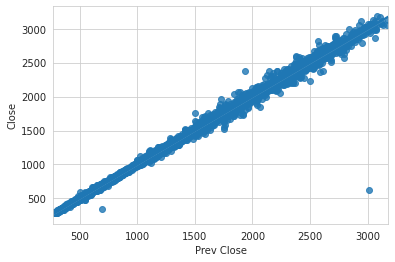

In [ ]:
import seaborn as sns

sns.set_style('whitegrid')
sns.regplot(x="Prev Close", y="Close", data=stock_data);

Text(0.5, 1.0, 'HDFC Autocorrelation plot')

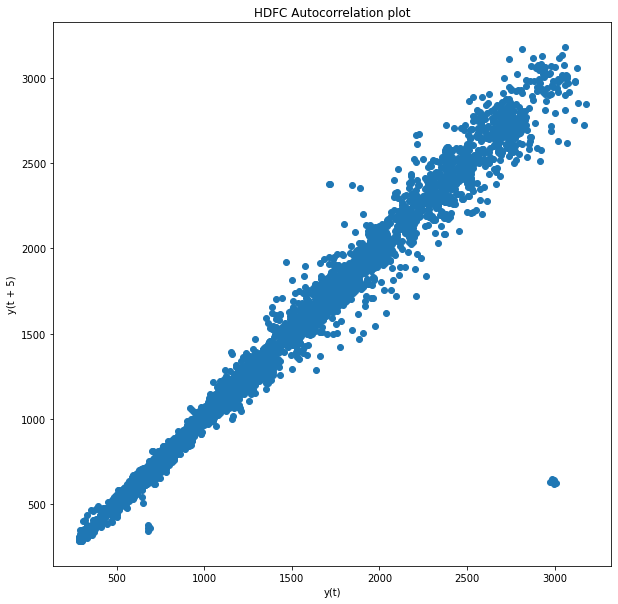

In [ ]:
from pandas.plotting import lag_plot
plt.figure(figsize=(10,10))
lag_plot(stock_data['Close'], lag=5)
plt.title('HDFC Autocorrelation plot')

In [ ]:
stock_data.keys()

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

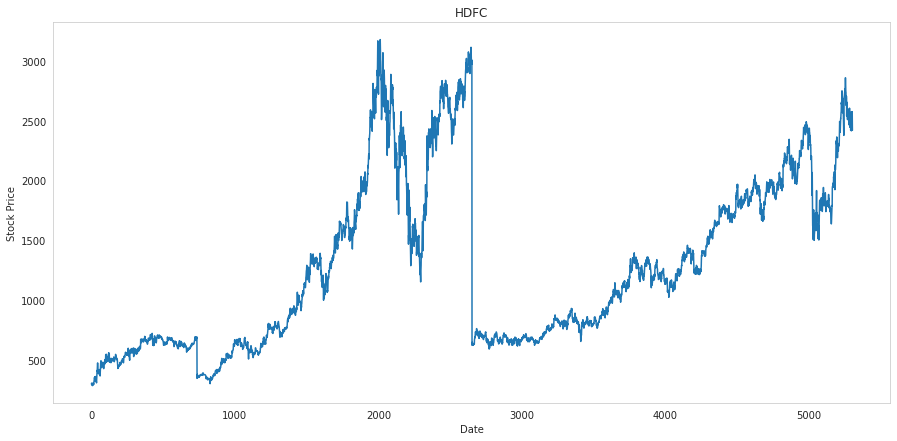

In [ ]:
stock_data.Close.plot(figsize=(15,7))
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('HDFC')
plt.grid()
plt.show()

In [ ]:
X=pd.DataFrame(stock_data)
X=X.drop(['Close','Date','Symbol','Series','VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],axis=1)
X=X.fillna(0)
print(X)

      Prev Close     Open     High      Low     Last
0         271.75   293.50   293.50   293.50   293.50
1         293.50   317.00   317.00   297.00   304.00
2         304.05   290.00   303.90   285.00   295.00
3         292.80   301.00   314.00   295.00   296.00
4         296.45   290.00   296.35   281.00   287.10
...          ...      ...      ...      ...      ...
5301     2497.35  2500.00  2534.10  2483.20  2502.00
5302     2509.80  2494.15  2526.80  2486.25  2514.00
5303     2518.40  2516.10  2609.00  2508.30  2575.00
5304     2577.00  2590.90  2628.00  2533.00  2539.70
5305     2538.85  2503.10  2525.00  2411.10  2433.25

[5306 rows x 5 columns]


Text(0.5, 1.0, 'HDFC Cumulative Returns')

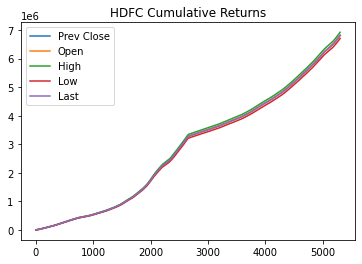

In [ ]:
# Comulative Return
dr = X.cumsum()
dr.plot()
plt.title('HDFC Cumulative Returns')

In [ ]:
y=stock_data['Close']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data=scaler.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(scaled_data)
x_pca = pca.transform(scaled_data)

In [ ]:
print(pca)
print(x_pca)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
[[-3.13562696 -0.02613959]
 [-3.08366846 -0.01318483]
 [-3.1155355   0.01041456]
 ...
 [ 3.97628008 -0.06022274]
 [ 4.06571835  0.02328824]
 [ 3.77714804  0.10968723]]


In [ ]:
scaled_data.shape


(5306, 5)

In [ ]:
x_pca.shape

(5306, 2)

Text(0, 0.5, 'Second Principal Component')

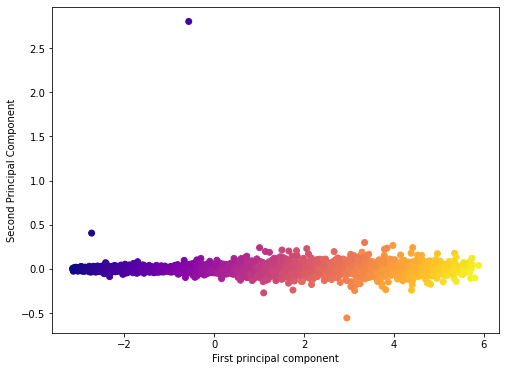

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=stock_data['Close'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=42,)

In [ ]:
x_pca

array([[-3.13562696, -0.02613959],
       [-3.08366846, -0.01318483],
       [-3.1155355 ,  0.01041456],
       ...,
       [ 3.97628008, -0.06022274],
       [ 4.06571835,  0.02328824],
       [ 3.77714804,  0.10968723]])

In [ ]:
X_train.shape

(4244, 2)

In [ ]:
X_test.shape

(1062, 2)

In [ ]:
y_train.shape

(4244,)

In [ ]:
y_test.shape

(1062,)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lr.coef_)
print(lr.intercept_)

[ 317.27734241 -447.18588057]
1283.9473599852931


In [ ]:
from sklearn.metrics import r2_score
y_pred=lr.predict(X_test)
print(r2_score(y_test,y_pred))

0.9986990943908585


In [ ]:
from pickle import dump
dump(pca,open("pca_model.pkl",'wb'))
dump(lr,open("linear_regression.pkl",'wb'))
dump(scaler,open('scaler.pkl','wb'))